In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData_df = pd.read_csv(city_data_to_load)
# len(cityData_df) 120
# cityData_df.head() 

rideData_df = pd.read_csv(ride_data_to_load)
# len(rideData_df) 2375
# rideData_df.head()

# Combine the data into a single dataset
merge_table = pd.merge(rideData_df, cityData_df, on=['city'])
# len(merge_table)

# Display the data table for preview.
# Make sure all the columns are there.
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
# Calculate Average Fare ($) Per City.

# Group by city.
# Count the number of rides (ride_id) for each city and assign to series variable.
# Sum the fares for each city and assign to a series variable.
# Merge the two series.
# Calculate average fare per city.

groupedCity_df = merge_table.groupby(['city'])

groupedRides = groupedCity_df["ride_id"].count()
# groupedRides

groupedFares = groupedCity_df["fare"].sum()
# groupedFares

# Merge the grouped series.
# Column headings are slightly misleading at this point.
# ride_id is a count of ride_ids
# fare is a sum of fares.
fareData_df = pd.merge(groupedRides, groupedFares, on="city")
# fareData_df

# Calculate average fare per city and add as a new column.
fareData_df["ave_fare"] = round(fareData_df['fare'] / fareData_df['ride_id'],2)
fareData_df.head()

# Rename the columns to prevent confusion.
renamed_df = fareData_df.rename(columns={"ride_id":"ride_count", "fare":"fare_sum"})
renamed_df.head()

# For the bubble plot, I need ride_count (x), ave_fare(y), type(color), and driver_count(bubble_size).
# type and driver_count are in cityData_df, so merge that with renamed_df.
fareDataFinal_df = pd.merge(renamed_df, cityData_df, on='city')

# Add a new blank column to the df for the color.
fareDataFinal_df['color'] = ''

# Populate the new column based on the type.
# From https://www.dataquest.io/blog/settingwithcopywarning/
fareDataFinal_df.loc[fareDataFinal_df.type == 'Urban', 'color'] = 'coral'
fareDataFinal_df.loc[fareDataFinal_df.type == 'Suburban', 'color'] = 'skyblue'
fareDataFinal_df.loc[fareDataFinal_df.type == 'Rural', 'color'] = 'gold'
fareDataFinal_df.head()



,city,ride_count,fare_sum,ave_fare,driver_count,type,color
0,Amandaburgh,18,443.55,24.64,12,Urban,coral
1,Barajasview,22,557.31,25.33,26,Urban,coral
2,Barronchester,16,582.76,36.42,11,Suburban,skyblue
3,Bethanyland,18,593.21,32.96,22,Suburban,skyblue
4,Bradshawfurt,10,400.64,40.06,7,Rural,gold


In [9]:
# Build the scatter plots for each city types.
# You have to break up the summary df into urban, suburban, and urban so the plot's legend 
# can automatically generate.

# Create three separate dataframes.
urban_df= fareDataFinal_df[fareDataFinal_df["type"]=="Urban"]
suburban_df= fareDataFinal_df[fareDataFinal_df["type"]=="Suburban"]
rural_df= fareDataFinal_df[fareDataFinal_df["type"]=="Rural"]

# Assign df columns to variables. Urban first:
urbanX = urban_df['ride_count']
urbanY = urban_df['ave_fare']
urbanS = urban_df['driver_count'] * 10
urbanColor = urban_df['color']
urbanType = urban_df['type']

# Suburban:
suburbanX = suburban_df['ride_count']
suburbanY = suburban_df['ave_fare']
suburbanS = suburban_df['driver_count'] * 10
suburbanColor = suburban_df['color']
suburbanType = suburban_df['type']

# Rural:
ruralX = rural_df['ride_count']
ruralY = rural_df['ave_fare']
ruralS = rural_df['driver_count'] * 10
ruralColor = rural_df['color']
ruralType = rural_df['type']



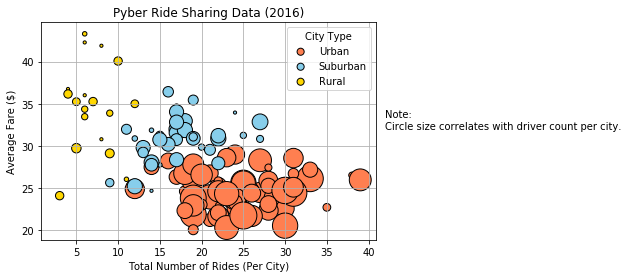

In [10]:
# Add title and labels for each axis.
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Plot each scatter using the variables.
urbanScatter = plt.scatter(urbanX, urbanY, urbanS, marker='o', color=urbanColor, edgecolors='0', label='Urban')
suburbanScatter = plt.scatter(suburbanX, suburbanY, suburbanS, marker='o', color=suburbanColor, edgecolors='0', label='Suburban')
urbanScatter = plt.scatter(ruralX, ruralY, ruralS, marker='o', color=ruralColor, edgecolors='0', label='Rural')

# Add a legend. Resize the markers in the legend because they appear in different sizes.
legend=plt.legend(title="City Type")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Add a grid to the plot.
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42,32,'Note:\nCircle size correlates with driver count per city.')

# Save figure and display it here.
plt.savefig('pyberBubble.png', bbox_inches='tight')

plt.show()




## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x198a16610f0>,
 [Text(1.105748159403219, 0.46617701356501196, 'Urban'),
  Text(-0.9324458606039298, 0.5835620935621134, 'Rural'),
  Text(-0.8999645257217735, -0.6325060098073245, 'Suburban')],
 [Text(0.6450197596518777, 0.27193659124625696, '62.7%'),
  Text(-0.508606833056689, 0.31830659648842546, '6.8%'),
  Text(-0.4908897413027855, -0.34500327807672243, '30.5%')])

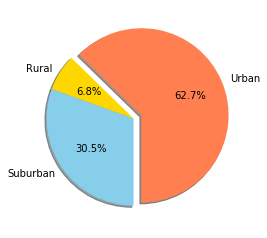

In [29]:
# Pie Chart Model:
    # Labels for the sections of our pie chart
    # labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

    # The values of each section of the pie chart
    # sizes = [220, 95, 80, 100]

    # The colors of each section of the pie chart
    # colors = ["red", "orange", "lightcoral", "lightskyblue"]

    # Tells matplotlib to seperate the "Python" section from the others
    # explode = (0.1, 0, 0, 0)
    # Creates the pie chart based upon the values above
    # Automatically finds the percentages of each part of the pie chart
    # plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    #         autopct="%1.1f%%", shadow=True, startangle=140)

# Calculate Type Percents
urbanFares = urban_df['fare_sum'].sum()
suburbanFares = suburban_df['fare_sum'].sum()
ruralFares = rural_df['fare_sum'].sum()
totalFares = urbanFares + suburbanFares + ruralFares
totalFares

urbanPct = round(urbanFares / totalFares * 100, 1)
suburbanPct = round(suburbanFares / totalFares * 100, 1)
ruralPct = round(ruralFares / totalFares * 100, 1)

labels = ['Urban', 'Rural', 'Suburban']
percentages = [urbanPct, ruralPct, suburbanPct]
colors = ['coral', 'gold', 'skyblue']
explode = (0.1, 0, 0)

plt.pie(percentages, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)



In [ ]:
# Build Pie Chart
# Save Figure

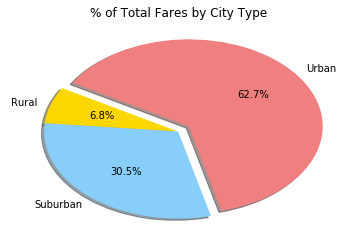

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


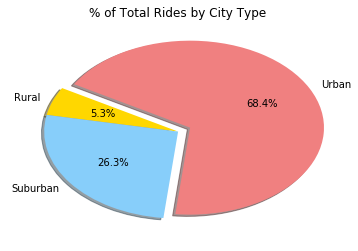

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


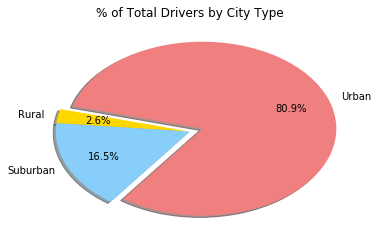

In [6]:
# Show Figure
plt.show()